In [261]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
import seaborn as sns
sns.set_style('darkgrid')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

In [262]:
# tweepy API auth object

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_token_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [263]:
# downloads image-predictions.tsv from host site

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image-predictions.tsv', 'wb').write(r.content)


335079

In [264]:
# imports image-predictions.tsv and reads into a df

predictions = pd.read_csv('image-predictions.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [265]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The above cells import the libraries we will be using and sets the tweepy auth object with our auth keys so that we can download the required information from Twitter. We also read in the 'twitter-archive-enhanced.csv' file that was provided and programmatically download the 'image-predictions.tsv' file from the supplied URL.

In [10]:
try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
except tweepy.TweepError as error:
    print(error.message)
   
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)
tweets = predictions['tweet_id']

tweet_data = []
for tweet_id in tweets:
    try:
        temp = api.get_status(tweet_id, tweet_mode='extended')._json
        tweet_data.append({'tweet_id':temp['id'],
                           'retweet_count':temp['retweet_count'],
                           'favorite_count':temp['favorite_count'],
                           'created_at':temp['created_at'],
                           'favorited':temp['favorited'],
                           'retweeted':temp['retweeted'],
                           'geo':temp['geo']
                           })
        print(str(tweet_id) + ' - done')
    except tweepy.TweepError as t:
        print('{} : {}'.format(tweet_id, t))

666020888022790149 - done
666029285002620928 - done
666033412701032449 - done
666044226329800704 - done
666049248165822465 - done
666050758794694657 - done
666051853826850816 - done
666055525042405380 - done
666057090499244032 - done
666058600524156928 - done
666063827256086533 - done
666071193221509120 - done
666073100786774016 - done
666082916733198337 - done
666094000022159362 - done
666099513787052032 - done
666102155909144576 - done
666104133288665088 - done
666268910803644416 - done
666273097616637952 - done
666287406224695296 - done
666293911632134144 - done
666337882303524864 - done
666345417576210432 - done
666353288456101888 - done
666362758909284353 - done
666373753744588802 - done
666396247373291520 - done
666407126856765440 - done
666411507551481857 - done
666418789513326592 - done
666421158376562688 - done
666428276349472768 - done
666430724426358785 - done
666435652385423360 - done
666437273139982337 - done
666447344410484738 - done
666454714377183233 - done
666644823164

671743150407421952 - done
671744970634719232 - done
671763349865160704 - done
671768281401958400 - done
671789708968640512 - done
671855973984772097 - done
671866342182637568 - done
671874878652489728 - done
671879137494245376 - done
671882082306625538 - done
671891728106971137 - done
671896809300709376 - done
672068090318987265 - done
672082170312290304 - done
672095186491711488 - done
672125275208069120 - done
672139350159835138 - done
672160042234327040 - done
672169685991993344 - done
672205392827572224 - done
672222792075620352 - done
672231046314901505 - done
672239279297454080 - done
672245253877968896 - done
672248013293752320 - done
672254177670729728 - done
672256522047614977 - done
672264251789176834 - done
672267570918129665 - done
672272411274932228 - done
672466075045466113 - done
672475084225949696 - done
672481316919734272 - done
672482722825261057 - done
672488522314567680 - done
672523490734551040 - done
672538107540070400 - done
672591271085670400 - done
672591762242

680913438424612864 - done
680934982542561280 - done
680940246314430465 - done
680959110691590145 - done
680970795137544192 - done
681193455364796417 - done
681231109724700672 - done
681242418453299201 - done
681261549936340994 - done
681281657291280384 - done
681297372102656000 - done
681302363064414209 - done
681320187870711809 - done
681339448655802368 - done
681523177663676416 - done
681579835668455424 - done
681610798867845120 - done
681654059175129088 - done
681679526984871937 - done
681694085539872773 - done
681891461017812993 - done
681981167097122816 - done
682003177596559360 - done
682032003584274432 - done
682047327939461121 - done
682059653698686977 - done
682242692827447297 - done
682259524040966145 - done
682303737705140231 - done
682389078323662849 - done
682393905736888321 - done
682406705142087680 - done
682429480204398592 - done
682638830361513985 - done
682662431982772225 - done
682697186228989953 - done
682750546109968385 - done
682788441537560576 - done
682962037429

Rate limit reached. Sleeping for: 685


699788877217865730 - done
699801817392291840 - done
700002074055016451 - done
700029284593901568 - done
700062718104104960 - done
700143752053182464 - done
700151421916807169 - done
700167517596164096 - done
700462010979500032 - done
700505138482569216 - done
700518061187723268 - done
700747788515020802 - done
700796979434098688 - done
700847567345688576 - done
700864154249383937 - done
700890391244103680 - done
701214700881756160 - done
701545186879471618 - done
701570477911896070 - done
701601587219795968 - done
701889187134500865 - done
701952816642965504 - done
701981390485725185 - done
702217446468493312 - done
702276748847800320 - done
702321140488925184 - done
702539513671897089 - done
702598099714314240 - done
702671118226825216 - done
702684942141153280 - done
702932127499816960 - done
703041949650034688 - done
703079050210877440 - done
703268521220972544 - done
703356393781329922 - done
703382836347330562 - done
703407252292673536 - done
703425003149250560 - done
703611486317

743510151680958465 - done
743545585370791937 - done
743595368194129920 - done
743609206067040256 - done
743895849529389061 - done
743980027717509120 - done
744234799360020481 - done
744334592493166593 - done
744709971296780288 - done
744971049620602880 - done
744995568523612160 - done
745057283344719872 - done
745314880350101504 - done
745422732645535745 - done
745433870967832576 - done
745712589599014916 - done
745789745784041472 - done
746056683365994496 - done
746131877086527488 - done
746369468511756288 - done
746507379341139972 - done
746726898085036033 - done
746790600704425984 - done
746818907684614144 - done
746872823977771008 - done
746906459439529985 - done
747103485104099331 - done
747204161125646336 - done
747219827526344708 - done
747461612269887489 - done
747512671126323200 - done
747594051852075008 - done
747600769478692864 - done
747816857231626240 - done
747844099428986880 - done
747885874273214464 - done
747933425676525569 - done
747963614829678593 - done
748307329658

788765914992902144 - done
788908386943430656 - done
789137962068021249 - done
789268448748703744 - done
789530877013393408 - done
789599242079838210 - done
789628658055020548 - done
789986466051088384 - done
790277117346975746 - done
790337589677002753 - done
790581949425475584 - done
790698755171364864 - done
790723298204217344 - done
790946055508652032 - done
790987426131050500 - done
791026214425268224 - done
791312159183634433 - done
791406955684368384 - done
791672322847637504 - done
792050063153438720 - done
792394556390137856 - done
792773781206999040 - done
792883833364439040 - done
792913359805018113 - done
793120401413079041 - done
793135492858580992 - done
793150605191548928 - done
793165685325201412 - done
793180763617361921 - done
793195938047070209 - done
793210959003287553 - done
793226087023144960 - done
793241302385262592 - done
793256262322548741 - done
793271401113350145 - done
793286476301799424 - done
793500921481273345 - done
793601777308463104 - done
793614319594

Rate limit reached. Sleeping for: 682


831670449226514432 - done
831911600680497154 - done
831939777352105988 - done
832032802820481025 - done
832040443403784192 - done
832215726631055365 - done
832273440279240704 - done
832369877331693569 - done
832397543355072512 - done
832636094638288896 - done
832757312314028032 - done
832769181346996225 - done
832998151111966721 - done
833124694597443584 - done
833479644947025920 - done
833722901757046785 - done
833826103416520705 - done
833863086058651648 - done
834086379323871233 - done
834167344700198914 - done
834209720923721728 - done
834458053273591808 - done
834574053763584002 - done
834786237630337024 - done
834931633769889797 - done
835152434251116546 - done
835172783151792128 - done
835264098648616962 - done
835297930240217089 - done
835574547218894849 - done
836001077879255040 - done
836260088725786625 - done
836380477523124226 - done
836677758902222849 - done
836753516572119041 - done
836989968035819520 - done
837012587749474308 : [{'code': 144, 'message': 'No status found 

This cell downloads the associated information from the WeRateDogs twitter based on TweetIDs provided by the predictions.tsv file and stores them in memory to a JSON file.

In [12]:
with open('tweet_json.txt', 'w', encoding='utf-8') as f:
    json.dump(tweet_data, f, ensure_ascii=False, indent=4)

In [266]:
df_tweets = pd.read_json('tweet_json.txt')

These cells dump the tweet information from the JSON file into a .txt file that is read into a dataframe.

___
# Assessing Data


### Assessing 'df_tweets' (JSON data)

In [267]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 7 columns):
tweet_id          2061 non-null int64
retweet_count     2061 non-null int64
favorite_count    2061 non-null int64
created_at        2061 non-null datetime64[ns, UTC]
favorited         2061 non-null bool
retweeted         2061 non-null bool
geo               0 non-null float64
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int64(3)
memory usage: 84.7 KB


In [268]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count,created_at,favorited,retweeted,geo
0,666020888022790149,473,2460,2015-11-15 22:32:08+00:00,False,False,NaN
1,666029285002620928,44,121,2015-11-15 23:05:30+00:00,False,False,NaN
2,666033412701032449,43,118,2015-11-15 23:21:54+00:00,False,False,NaN
3,666044226329800704,134,279,2015-11-16 00:04:52+00:00,False,False,NaN
4,666049248165822465,41,99,2015-11-16 00:24:50+00:00,False,False,NaN


In [269]:
df_tweets.tail()

,tweet_id,retweet_count,favorite_count,created_at,favorited,retweeted,geo
2056,891327558926688256,8668,38363,2017-07-29 16:00:24+00:00,False,False,NaN
2057,891689557279858688,8021,40170,2017-07-30 15:58:51+00:00,False,False,NaN
2058,891815181378084864,3848,23893,2017-07-31 00:18:03+00:00,False,False,NaN
2059,892177421306343426,5821,31710,2017-08-01 00:17:27+00:00,False,False,NaN
2060,892420643555336193,7851,36844,2017-08-01 16:23:56+00:00,False,False,NaN


In [270]:
sum(df_tweets.duplicated())

0



### 'df_tweets' Quality & Tidiness Issues:
- Drop 'geo' column, as there are no entries in this column
- Drop 'favorited' and 'retweeted' columns as they provide no data (all entries are 'false')
- This table will need to be merged with the 'archive' dataframe later


In [271]:
# makes a copy of the table and drops the 'geo', 'favorited', and 'retweeted' columns from the copied table

df_tweets_copy = df_tweets.copy()
df_tweets_copy.drop(['geo', 'favorited', 'retweeted'], axis=1, inplace=True)

___

### Assessing 'archive' data

In [272]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [273]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [274]:
sum(archive.duplicated())

0

In [275]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob


### 'archive' Quality & Tidiness Issues:
- Some of the dog names in the 'name' column appear to be parts of the tweet text and not actual names, such as 'None', 'a', 'is', 'the'. 
- The 'timestamp' column is a string datatype, and will need to be converted to a datetime object datatype.
- Some columns will be dropped as they provide no useful data, such as 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' once we use the information in those columns to determine which tweets are original and which are retweets or replies.
- The 'source' column values are all inside HTML hyperlinks tags -- we will want to extract the string information inside the tags and remove the HTML code from the rows in this column.
- The 'expanded_urls' is missing 59 values -- some of these may be due to retweets or replies, but this will be explored in order to retreive only original tweets with ratings and images.
- After merging the 'df_tweets' JSON table with the 'archive' table, the 'retweet_count' and 'favorite_count' columns have changed from int64 to float64 datatypes, these need to be changed back to int64.
- 'retweet_count' and 'favorite_count' each have 295 missing values, potentially due to some of these being retweets and replies. 
- Merge df_tweets_copy with archive_copy
- A key point for the analysis is that we are only interested in original tweets, we will have to remove all retweets and replies

In [276]:
# creates a copy of 'archive' to keep the original table intact and converts the 'timestamp' column to a datetime object and verifies the change.

archive_copy = archive.copy()
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp']) 
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [277]:
# removes rows where the tweets are replies & verifies they are removed

archive_copy = archive_copy[archive_copy.in_reply_to_status_id.isna()]
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns, UTC]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns

In [278]:
# removes rows where the tweets are retweets & verifies they are removed

archive_copy = archive_copy[archive_copy.retweeted_status_id.isna()]
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns, UTC]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns, UTC]

In [279]:
# merges 'df_tweets_copy' into 'archive_copy'

archive_copy = pd.merge(archive_copy, df_tweets_copy, on = 'tweet_id', how = 'left')
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,created_at
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7851.0,36844.0,2017-08-01 16:23:56+00:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5821.0,31710.0,2017-08-01 00:17:27+00:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3848.0,23893.0,2017-07-31 00:18:03+00:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8021.0,40170.0,2017-07-30 15:58:51+00:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8668.0,38363.0,2017-07-29 16:00:24+00:00


In [280]:
# replaces null values in the 'retweet_count' and 'favorite_count' columns as zeroes and converts the two columns from float to integer datatypes

archive_copy['retweet_count'] = archive_copy['retweet_count'].fillna(0).astype(int)
archive_copy['favorite_count'] = archive_copy['favorite_count'].fillna(0).astype(int)

archive_copy['retweet_count'].astype(int)
archive_copy['favorite_count'].astype(int)
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 20 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns, UTC]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
retweet_count              

In [281]:
# exploring the 'source' column's values being inside of HTML hyperlink tags

archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [282]:
# extracts the string from the 'source' column's values between the HTML tags with regex and removes those HTML tags

archive_copy['source']  = archive_copy['source'].str.extract('^<a.+>(.+)</a>$')
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,created_at
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7851,36844,2017-08-01 16:23:56+00:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5821,31710,2017-08-01 00:17:27+00:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3848,23893,2017-07-31 00:18:03+00:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8021,40170,2017-07-30 15:58:51+00:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8668,38363,2017-07-29 16:00:24+00:00


In [283]:
# verifies the HTML tags are removed from the 'source' column

archive_copy['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [284]:
# checks the 'name' column to determine how to tackle the issue of some names being words such as 'a', 'is', 'none', etc.

archive_copy['name'].value_counts().head(30)

None       603
a           55
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Lola         8
Sadie        8
the          8
Winston      8
Daisy        7
Toby         7
Bo           6
Koda         6
Oscar        6
Bailey       6
Jax          6
Stanley      6
an           6
Bella        6
Rusty        5
Chester      5
Leo          5
Louis        5
Milo         5
Bentley      5
Dave         5
Buddy        5
Name: name, dtype: int64

All of the names that are actual names are capitalized, the "names" that are words all seem to be lowercase. We will use regex code to return a list of names in the 'name' column that are lowercase to separate these from the capitalized names.


In [285]:
name_errors = archive_copy.name.str.contains('^[a-z]', regex=True)
archive_copy[name_errors].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [286]:
# displays the number of names that are not capitalized that have been found

name_errors.sum()

104

There are 104 names returned that are lowercase and clearly not actual dog names, the easiest way to clean this will be to just replace the name with "None" rather than remove the rows.

In [287]:
# replaces all names in the 'name_errors' list with "None"
archive_copy.loc[name_errors, 'name'] = "None"

In [288]:
# double checks to ensure those values in the 'name' column's tail that displayed above have been changed

archive_copy.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,created_at
2077,666273097616637952,NaN,NaN,2015-11-16 15:14:19+00:00,Twitter for iPhone,Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None,74,161,2015-11-16 15:14:19+00:00
2078,666268910803644416,NaN,NaN,2015-11-16 14:57:41+00:00,Twitter for iPhone,Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None,32,96,2015-11-16 14:57:41+00:00
2079,666104133288665088,NaN,NaN,2015-11-16 04:02:55+00:00,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None,6087,13660,2015-11-16 04:02:55+00:00
2080,666102155909144576,NaN,NaN,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None,11,73,2015-11-16 03:55:04+00:00
2081,666099513787052032,NaN,NaN,2015-11-16 03:44:34+00:00,Twitter for iPhone,Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None,63,143,2015-11-16 03:44:34+00:00
2082,666094000022159362,NaN,NaN,2015-11-16 03:22:39+00:00,Twitter for iPhone,This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None,68,156,2015-11-16 03:22:39+00:00
2083,666082916733198337,NaN,NaN,2015-11-16 02:38:37+00:00,Twitter for iPhone,Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None,42,104,2015-11-16 02:38:37+00:00
2084,666073100786774016,NaN,NaN,2015-11-16 01:59:36+00:00,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None,147,304,2015-11-16 01:59:36+00:00
2085,666071193221509120,NaN,NaN,2015-11-16 01:52:02+00:00,Twitter for iPhone,Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None,54,137,2015-11-16 01:52:02+00:00
2086,666063827256086533,NaN,NaN,2015-11-16 01:22:45+00:00,Twitter for iPhone,This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,None,None,None,None,None,201,452,2015-11-16 01:22:45+00:00


In [289]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 20 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns, UTC]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
retweet_count              

The next issue to tackle is the issue of the four stages of dogs being in four separate columns. Since this is a variable, it needs to be a single column. To do this, we will melt the four columns with the stages of dogs (doggo, floofer, pupper, puppo) into one column titled 'stage'.

In [290]:
# melts the four stages of dog into one column

archive_copy = pd.melt(archive_copy, id_vars=['tweet_id', 'in_reply_to_status_id','in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id','retweeted_status_user_id', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'retweet_count', 'favorite_count', 'created_at'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], value_name='stage')


In [291]:
# checks to see the counts of the different stages

archive_copy.stage.value_counts()

None       8041
pupper      230
doggo        83
puppo        24
floofer      10
Name: stage, dtype: int64

In [292]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 17 columns):
tweet_id                    8388 non-null int64
in_reply_to_status_id       0 non-null float64
in_reply_to_user_id         0 non-null float64
timestamp                   8388 non-null datetime64[ns, UTC]
source                      8388 non-null object
text                        8388 non-null object
retweeted_status_id         0 non-null float64
retweeted_status_user_id    0 non-null float64
expanded_urls               8376 non-null object
rating_numerator            8388 non-null int64
rating_denominator          8388 non-null int64
name                        8388 non-null object
retweet_count               8388 non-null int64
favorite_count              8388 non-null int64
created_at                  7856 non-null datetime64[ns, UTC]
variable                    8388 non-null object
stage                       8388 non-null object
dtypes: datetime64[ns, UTC](2), float64(4), int

For readability, we'll shift the statistically relevant columns to the left of the dataframe in order to more easily see the more relevant information.

In [293]:
# rearranges the columns so that more pertinent information is at the left of the df instead of the far right

archive_copy = archive_copy[['tweet_id', 'text', 'name', 'rating_numerator', 'rating_denominator', 'stage', 'retweet_count', 'favorite_count', 'source', 'created_at', 'expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'variable']]              

In [294]:
# drops columns that aren't relevant, now that we've used them to verify actual tweets from replies & retweets

archive_copy.drop(['retweeted_status_user_id', 'retweeted_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id', 'variable'], axis=1, inplace=True)


In [295]:
archive_copy

,tweet_id,text,name,rating_numerator,rating_denominator,stage,retweet_count,favorite_count,source,created_at,expanded_urls
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,13,10,None,7851,36844,Twitter for iPhone,2017-08-01 16:23:56+00:00,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,13,10,None,5821,31710,Twitter for iPhone,2017-08-01 00:17:27+00:00,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,12,10,None,3848,23893,Twitter for iPhone,2017-07-31 00:18:03+00:00,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,13,10,None,8021,40170,Twitter for iPhone,2017-07-30 15:58:51+00:00,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,12,10,None,8668,38363,Twitter for iPhone,2017-07-29 16:00:24+00:00,https://twitter.com/dog_rates/status/891327558...
...,...,...,...,...,...,...,...,...,...,...,...
8383,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,None,5,10,None,41,99,Twitter for iPhone,2015-11-16 00:24:50+00:00,https://twitter.com/dog_rates/status/666049248...
8384,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,None,6,10,None,134,279,Twitter for iPhone,2015-11-16 00:04:52+00:00,https://twitter.com/dog_rates/status/666044226...
8385,666033412701032449,Here is a very happy pup. Big fan of well-main...,None,9,10,None,43,118,Twitter for iPhone,2015-11-15 23:21:54+00:00,https://twitter.com/dog_rates/status/666033412...
8386,666029285002620928,This is a western brown Mitsubishi terrier. Up...,None,7,10,None,44,121,Twitter for iPhone,2015-11-15 23:05:30+00:00,https://twitter.com/dog_rates/status/666029285...


In [296]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 11 columns):
tweet_id              8388 non-null int64
text                  8388 non-null object
name                  8388 non-null object
rating_numerator      8388 non-null int64
rating_denominator    8388 non-null int64
stage                 8388 non-null object
retweet_count         8388 non-null int64
favorite_count        8388 non-null int64
source                8388 non-null object
created_at            7856 non-null datetime64[ns, UTC]
expanded_urls         8376 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 721.0+ KB


In [297]:
# drops any duplicate rows from the dataframe

archive_copy.drop_duplicates(inplace=True)

In [298]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2444 entries, 0 to 7158
Data columns (total 11 columns):
tweet_id              2444 non-null int64
text                  2444 non-null object
name                  2444 non-null object
rating_numerator      2444 non-null int64
rating_denominator    2444 non-null int64
stage                 2444 non-null object
retweet_count         2444 non-null int64
favorite_count        2444 non-null int64
source                2444 non-null object
created_at            2276 non-null datetime64[ns, UTC]
expanded_urls         2440 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 229.1+ KB


There are four less entries in the 'expanded_urls' column, so we need to ensure these are valid and original tweets (not a retweet or reply). We'll do this by pulling these four tweets to see if they have text and a rating.

In [299]:
sum(archive_copy.expanded_urls.isna())


4

In [300]:
# retrieves the four tweets that have no expanded urls to see if they have a rating

no_urls = archive_copy.expanded_urls.isna()
archive_copy[no_urls][['tweet_id', 'text', 'rating_numerator', 'expanded_urls']]

,tweet_id,text,rating_numerator,expanded_urls
295,828361771580813312,Beebop and Doobert should start a band 12/10 w...,12,NaN
538,785515384317313025,"Today, 10/10, should be National Dog Rates Day",10,NaN
1222,696518437233913856,Oh my god 10/10 for every little hot dog pupper,10,NaN
5416,696518437233913856,Oh my god 10/10 for every little hot dog pupper,10,NaN


In [301]:
# tweets @ index 1222, and 5416 are duplicate tweets, so we will drop index 5416 & verify it has been dropped 

archive_copy.drop(index=5416, inplace=True)
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 7158
Data columns (total 11 columns):
tweet_id              2443 non-null int64
text                  2443 non-null object
name                  2443 non-null object
rating_numerator      2443 non-null int64
rating_denominator    2443 non-null int64
stage                 2443 non-null object
retweet_count         2443 non-null int64
favorite_count        2443 non-null int64
source                2443 non-null object
created_at            2276 non-null datetime64[ns, UTC]
expanded_urls         2440 non-null object
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 229.0+ KB


The three remaining tweets have ratings, just no expanded url entry. As there are only three, we will leave them in place.

There are also 167 tweets that are missing a "created_at" entry, we will check these to make sure they are actual tweets with ratings.

In [302]:
no_timestamp = archive_copy.created_at.isna()
archive_copy[no_timestamp][['tweet_id', 'text', 'name', 'rating_numerator', 'expanded_urls', 'created_at']]

,tweet_id,text,name,rating_numerator,expanded_urls,created_at
32,885518971528720385,I have a new hero and his name is Howard. 14/1...,None,14,https://twitter.com/4bonds2carbon/status/88551...,NaT
38,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,None,13,https://twitter.com/kaijohnson_19/status/88396...,NaT
65,878604707211726852,Martha is stunning how h*ckin dare you. 13/10 ...,None,13,https://twitter.com/bbcworld/status/8785998685...,NaT
73,876537666061221889,I can say with the pupmost confidence that the...,None,14,https://twitter.com/mpstowerham/status/8761629...,NaT
78,875097192612077568,You'll get your package when that precious man...,None,13,https://twitter.com/drboondoc/status/874413398...,NaT
...,...,...,...,...,...,...
5598,684147889187209216,This is Sweets the English Bulldog. Waves back...,Sweets,12,https://vine.co/v/ib2nTOEuuOI,NaT
5716,678708137298427904,Here we are witnessing a wild field pupper. Lo...,None,10,https://vine.co/v/eQjxxYaQ60K,NaT
5762,676916996760600576,Super speedy pupper. Does not go gentle into t...,None,10,https://vine.co/v/imJ0BdZOJTw,NaT
5773,676593408224403456,This pupper loves leaves. 11/10 for committed ...,None,11,https://vine.co/v/eEQQaPFbgOY,NaT


These appear to be valid tweets that reference videos or other post dogs, but they have original ratings, so we will leave them.

In [303]:
# the 'archive_copy' table is clean enough for the purposes of this analysis, so we will save it to a new dataframe entitled 'archive_clean' and export this file to a .csv called 'twitter_archive_master.csv'

archive_clean = archive_copy

___

### Assessing 'predictions' data

In [304]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [305]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [306]:
sum(predictions.duplicated())

0

In [307]:
# makes a copy of the predictions table

predictions_copy = predictions.copy()

In [308]:
predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


We have 2443 tweets in our twitter archive that we have cleaned above, but the predictions file only contains 2075 tweets. As such, we will want to mergge the predictions table with our archive table so that only the tweets with images used in the predictions file are merged into a new table. For this analysis, we will also want to take the best confidence ratings & breed prediction from the predictions table for our analysis.

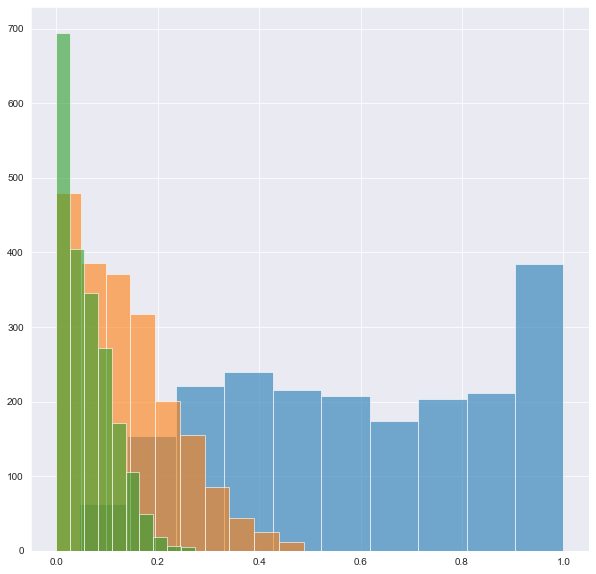

In [309]:
# gets a quick look at the distribution of the confidence ratings in the predictions table

predictions_copy.p1_conf.hist(alpha=0.6), predictions_copy.p2_conf.hist(alpha=0.6), predictions_copy.p3_conf.hist(alpha=0.6);

In [310]:
# creates a conditional that looks at which of the three confidence columns, where 'dog == true', and takes the confidence rating and breed prediction that are highest
# places those in two new columns, 'breed_prediction' and 'confidence_level'.

conditionals = [(predictions_copy['p1_dog'] == True), (predictions_copy['p2_dog'] == True), (predictions_copy['p3_dog'] == True)]
breed_predictions = [predictions_copy['p1'], predictions_copy['p2'], predictions_copy['p3']]
choices_confidence = [predictions_copy['p1_conf'], predictions_copy['p2_conf'], predictions_copy['p3_conf']]
predictions_copy['breed_prediction'] = np.select(conditionals, breed_predictions, default = 'none')
predictions_copy['confidence_level'] = np.select(conditionals, choices_confidence, default = 0)

In [311]:
predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_prediction,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [312]:
# joins the breed_predictions and confidence_level columns with the archive_clean table

merge_cols = ['tweet_id', 'breed_prediction', 'confidence_level']
archive_clean = pd.merge(archive_clean, predictions_copy[merge_cols], on='tweet_id', how='inner')

In [313]:
archive_clean.head()

,tweet_id,text,name,rating_numerator,rating_denominator,stage,retweet_count,favorite_count,source,created_at,expanded_urls,breed_prediction,confidence_level
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,13,10,None,7851,36844,Twitter for iPhone,2017-08-01 16:23:56+00:00,https://twitter.com/dog_rates/status/892420643...,none,0.000000
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,13,10,None,5821,31710,Twitter for iPhone,2017-08-01 00:17:27+00:00,https://twitter.com/dog_rates/status/892177421...,Chihuahua,0.323581
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,12,10,None,3848,23893,Twitter for iPhone,2017-07-31 00:18:03+00:00,https://twitter.com/dog_rates/status/891815181...,Chihuahua,0.716012
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,13,10,None,8021,40170,Twitter for iPhone,2017-07-30 15:58:51+00:00,https://twitter.com/dog_rates/status/891689557...,Labrador_retriever,0.168086
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,12,10,None,8668,38363,Twitter for iPhone,2017-07-29 16:00:24+00:00,https://twitter.com/dog_rates/status/891327558...,basset,0.555712


In [314]:
# checks to see the values of the 'rating_denominator' column to see if it is necessary to leave in the table

archive_clean.rating_denominator.value_counts()

10     2267
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [315]:
# by far, most values in the rating_denominator column are >10, with a handful of outliers. As such, we will drop that column as it's not really necessary, and will rename the 'rating_numerator' column to 'rating'

archive_clean.drop(['rating_denominator'], axis=1, inplace=True)

In [316]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 2283
Data columns (total 12 columns):
tweet_id            2284 non-null int64
text                2284 non-null object
name                2284 non-null object
rating_numerator    2284 non-null int64
stage               2284 non-null object
retweet_count       2284 non-null int64
favorite_count      2284 non-null int64
source              2284 non-null object
created_at          2276 non-null datetime64[ns, UTC]
expanded_urls       2284 non-null object
breed_prediction    2284 non-null object
confidence_level    2284 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(6)
memory usage: 232.0+ KB


In [317]:
# renames the rating_numerator' column to 'rating'

archive_clean.rename(columns={'rating_numerator':'rating'}, inplace=True)

In [318]:
# rearranges the columns one more time just to make everything slightly easier to read for the analysis

archive_final = archive_clean[['tweet_id', 'breed_prediction', 'confidence_level', 'retweet_count', 'favorite_count', 'rating', 'stage', 'source', 'created_at', 'text', 'expanded_urls']]        

In [319]:
archive_final.head()

,tweet_id,breed_prediction,confidence_level,retweet_count,favorite_count,rating,stage,source,created_at,text,expanded_urls
0,892420643555336193,none,0.000000,7851,36844,13,None,Twitter for iPhone,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Chihuahua,0.323581,5821,31710,13,None,Twitter for iPhone,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,Chihuahua,0.716012,3848,23893,12,None,Twitter for iPhone,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,Labrador_retriever,0.168086,8021,40170,13,None,Twitter for iPhone,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,basset,0.555712,8668,38363,12,None,Twitter for iPhone,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...


In [320]:
# replaces the underscores in the 'breed_prediction' column to spaces

archive_final.breed_prediction = archive_final.breed_prediction.str.replace('_', ' ')

/Users/mattb/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [321]:
# converts the text in the 'breed_prediction' column to lowercase

archive_final['breed_prediction'] = archive_final['breed_prediction'].str.lower()

/Users/mattb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [322]:
archive_final.head()

,tweet_id,breed_prediction,confidence_level,retweet_count,favorite_count,rating,stage,source,created_at,text,expanded_urls
0,892420643555336193,none,0.000000,7851,36844,13,None,Twitter for iPhone,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,chihuahua,0.323581,5821,31710,13,None,Twitter for iPhone,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,chihuahua,0.716012,3848,23893,12,None,Twitter for iPhone,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,labrador retriever,0.168086,8021,40170,13,None,Twitter for iPhone,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,basset,0.555712,8668,38363,12,None,Twitter for iPhone,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...


In [323]:
archive_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 2283
Data columns (total 11 columns):
tweet_id            2284 non-null int64
breed_prediction    2284 non-null object
confidence_level    2284 non-null float64
retweet_count       2284 non-null int64
favorite_count      2284 non-null int64
rating              2284 non-null int64
stage               2284 non-null object
source              2284 non-null object
created_at          2276 non-null datetime64[ns, UTC]
text                2284 non-null object
expanded_urls       2284 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 214.1+ KB


In [324]:
# saves our master archive table to a csv file

archive_final.to_csv('twitter_archive_master.csv')

____


# Summary of assessing data quality & tidiness issues

There were numerous issues with the three datasets that needed to be corrected before any analysis can take place. Issues will be sorted into two categories: 'Quality Issues', in which the issues are related to the content of the data, such as inaccurate data, corrupted data, or duplicate data, and 'Tidiness Issues', in which the issues are related to the structure of the data itself, also known as messy data.

## Quality Issues:

- The 'Timestamp' column from the 'archive' table needs to be converted to a datetime object
- Some of the dog names in the 'archive' table appear to be part of the tweet text and not names, such as 'None', 'a', 'is', 'the'
- A key point of the analysis is to only have original tweets, no retweets or replies. Replies & retweets will need to be removed.
- Drop 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' from the 'archive' table, as they do not contain useful data beyond determining if tweets were replies
- Drop 'geo' column from the 'df_tweets' table, as there are no entries in this column
- Drop 'favorited' and 'retweeted' columns from the 'df_tweets' table as they provide no data (all entries are 'false')
- The 'archive' table's 'source' column values are all inside HTML hyperlinks tags
- 'retweet_count' and 'favorite_count' each have 295 missing values, likely due to non-original tweets in the archive that will be dropped
- After merging the 'df_tweets' JSON table with the 'archive' table, the 'retweet_count' and 'favorite_count' columns have changed from int64 to float64 datatypes, these need to be changed back to int64
- The 'archive' table is missing 167 values in the 'created_at' column
- The 'archive' table is missing 65 values from the 'expanded_urls' column
- Duplicate tweet_id at index 1222 and 5416
- Three tweets with missing expanded_urls need to be checked to ensure they actually have ratings
- Replace '_' in 'breed_prediction' column to spaces and convert values in column to lowercase
- Drop 'rating_denominator' column from 'archive, because the far majority of values are '10' or greater.



## Tidiness Issues:
- Dog categories (doggo, floofer, pupper, puppo) are currently in four columns, since this is a variable, it needs to be one column
- The df_tweets table, created from JSON file, should be merged with the 'archive' table
- Columns need rearranged so that more pertinent information is on the left instead of the far right of the df
- There are several unneccessary columns relating to retweets that need to be dropped from the 'archive' table

To make these three datasets easier to work with, they will be merged together before any cleaning takes place.

# Insights & Analysis

In [325]:
# create a copy of our final archive table for our analysis
weratedogs = archive_final.copy()

In [326]:
weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 2283
Data columns (total 11 columns):
tweet_id            2284 non-null int64
breed_prediction    2284 non-null object
confidence_level    2284 non-null float64
retweet_count       2284 non-null int64
favorite_count      2284 non-null int64
rating              2284 non-null int64
stage               2284 non-null object
source              2284 non-null object
created_at          2276 non-null datetime64[ns, UTC]
text                2284 non-null object
expanded_urls       2284 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 214.1+ KB


____

#### What are the distribution of the various dog stages, as defined by WeRateDogs (doggo, floofer, puppo, pupper)?

In [327]:
weratedogs.stage.value_counts()

None       1971
pupper      209
doggo        73
puppo        23
floofer       8
Name: stage, dtype: int64

'None' is the most common classification of dog stage in the twitter archive, so let's remove 'None' to only show stages that have a classification attached:

In [328]:
stage_sum = sum(weratedogs.stage != 'None')
stage_sum / weratedogs.tweet_id.count()

0.13704028021015763

There is a very low number of stages assigned to the dogs, only 13.7% of the tweets in this archive have assigned a stage to the dog referenced in the tweet.

#### What are the top five breeds, as identified by the predictions table, based on number of tweets?

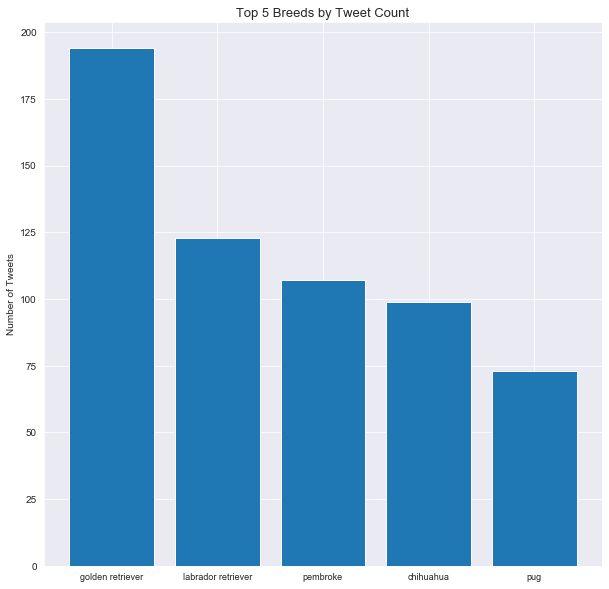

In [329]:
top5_breeds = weratedogs[weratedogs.breed_prediction != 'none'].breed_prediction.value_counts().head()


plt.bar(top5_breeds.index, top5_breeds)
plt.ylabel('Number of Tweets', fontsize = 10)
plt.title('Top 5 Breeds by Tweet Count', fontsize = 13)
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show();

The most tweeted about breed of dog that was identified in the predictions table is the (very good) Golden Retriever, with nearly 200 tweets, followed by the Labrador Retriever, Pembroke, Chihuahua, and Pug breeds. The Labrador Retriever, Pembroke, and Chihuahua are all relatively close in numbers (~100 - ~125). But while Golden Retrievers are the most tweeted about breed, how do they fair when comparing the breed of dog to the most favorited and most retweeted tweets?

In [330]:
# finds the top 5 breeds of dogs based on number of favorited tweets

fav_tweets_breed = weratedogs[weratedogs.breed_prediction != 'none']
fav_tweets_breed = fav_tweets_breed.groupby(['breed_prediction'])
fav_tweets_breed = fav_tweets_breed['favorite_count'].sum()
fav_tweets_breed = fav_tweets_breed.sort_values(ascending = False)
top5_breeds_fav_tweets = fav_tweets_breed.head()


In [331]:
# finds the top 5 breeds of dogs based on number of retweets

rt_breed = weratedogs[weratedogs.breed_prediction != 'none']
rt_breed = rt_breed.groupby(['breed_prediction'])
rt_breed = rt_breed['retweet_count'].sum()
rt_breed = rt_breed.sort_values(ascending = False)
top5_rt_breeds = rt_breed.head()


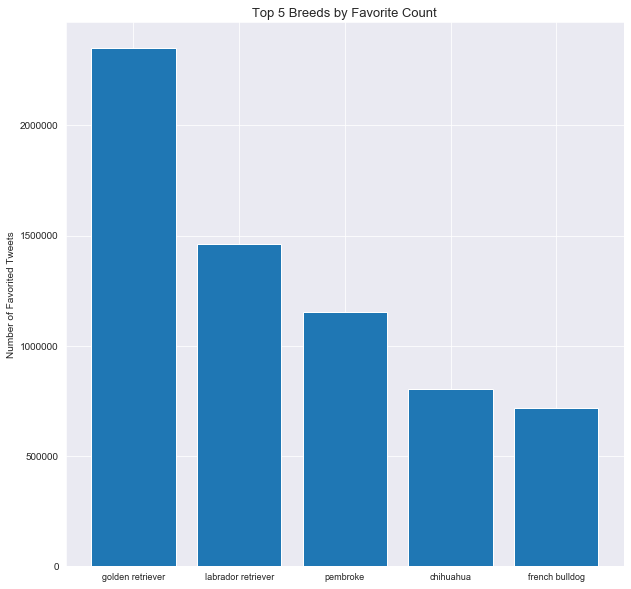

In [332]:
plt.bar(top5_breeds_fav_tweets.index, top5_breeds_fav_tweets)
plt.ylabel('Number of Favorited Tweets', fontsize = 10)
plt.title('Top 5 Breeds by Favorite Count', fontsize = 13)
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show();

Relationship between number of favorited tweets and retweets:

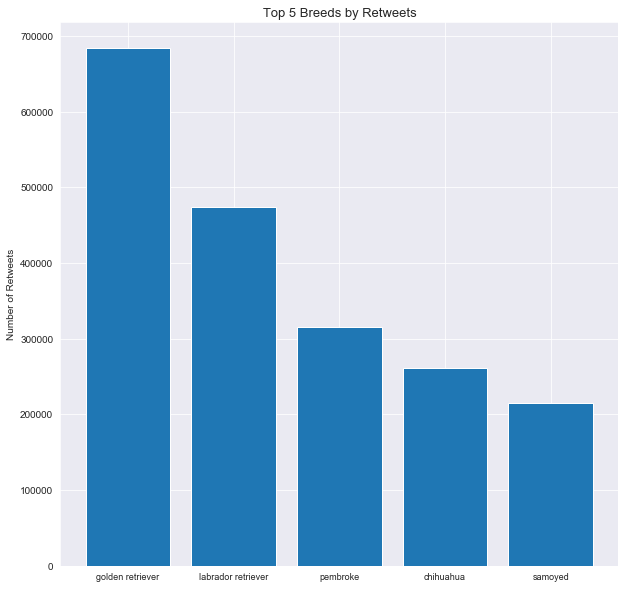

In [333]:
plt.bar(top5_rt_breeds.index.tolist(), top5_rt_breeds)
plt.ylabel('Number of Retweets', fontsize = 10)
plt.title('Top 5 Breeds by Retweets', fontsize = 13)
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show();

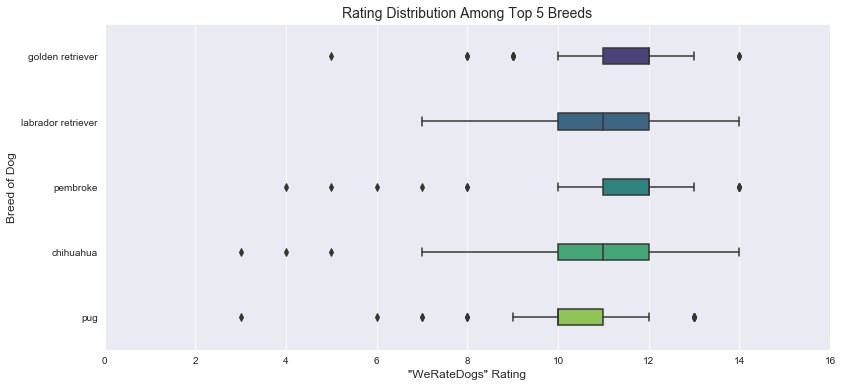

In [334]:
plt.figure(figsize = (13, 6))
boxplot = sns.boxplot(y='breed_prediction', palette='viridis', x='rating', data=weratedogs, orient='h', width=0.25, order=top5_breeds.index.tolist())

plt.xlim(0, 16)
plt.xlabel('"WeRateDogs" Rating',  fontsize = 12)
plt.ylabel("Breed of Dog",  fontsize = 12)
plt.title('Rating Distribution Among Top 5 Breeds', fontsize = 14)
plt.show();

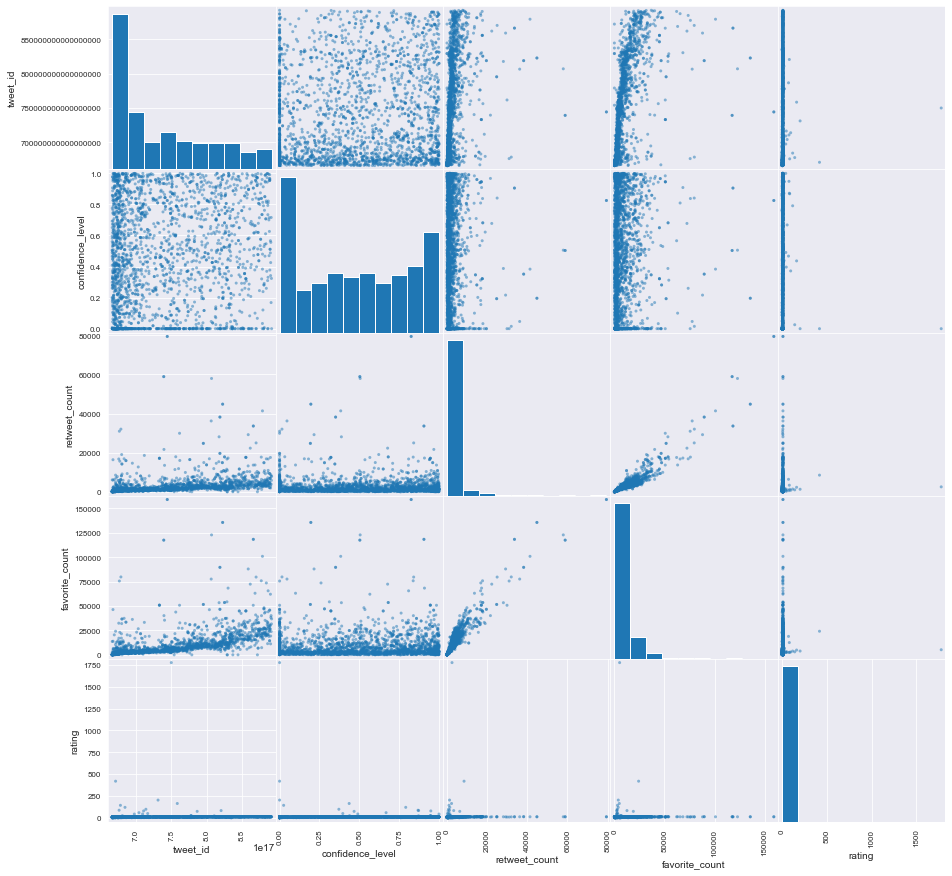

In [335]:
pd.plotting.scatter_matrix(weratedogs, figsize=(15,15));
